# Capstone Two: Modeling

In [18]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sbn
import itertools
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Import data
dir2 = '/home/kc3pve/Desktop/Spring-Git/Springboard/Credit/data/'
X1_train_new = dir2  + 'X1_train_new.csv'
Y1_train_new = dir2  + 'Y1_train_new.csv'
X1_test_new  = dir2  + 'X1_test_new.csv'
Y1_test_new  = dir2  + 'Y1_test_new.csv'

In [20]:
# Name them
X1_train_new = pd.read_csv(X1_train_new)
Y1_train_new = pd.read_csv(Y1_train_new)
X1_test_new  = pd.read_csv(X1_test_new)
Y1_test_new  = pd.read_csv(Y1_test_new)

In [21]:
X1_train_new.shape

(11730, 13)

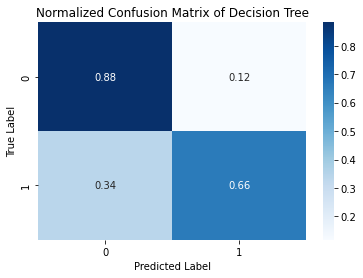

Accuracy Score is 0.7721468
          0         1
0  0.881883  0.118117
1  0.337590  0.662410


In [22]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(max_depth=16,
                               min_samples_split=8,
                               random_state=1024)

model.fit(X1_train_new, Y1_train_new)
Y1_predict = model.predict(X1_test_new)

cm1a = confusion_matrix(Y1_test_new,Y1_predict)
sum_mat1 = np.sum(cm1a, axis=1)
cm1 = cm1a/sum_mat1[0]
sns.heatmap(cm1, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of Decision Tree")
plt.savefig('Image_5.png',facecolor='w')
plt.show()

print('Accuracy Score is {:.7}'.format(accuracy_score(Y1_test_new, Y1_predict)))
print(pd.DataFrame(cm1))

# plt.savefig('Image_5.png',facecolor='w')



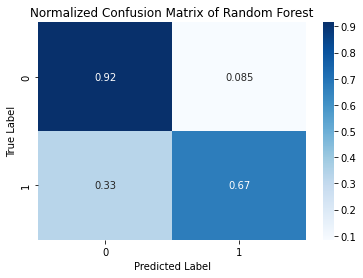

Accuracy Score is 0.792498
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      3122
           1       0.67      0.89      0.76      1890

    accuracy                           0.79      5012
   macro avg       0.79      0.81      0.79      5012
weighted avg       0.82      0.79      0.80      5012



In [23]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150,
                              max_depth=16,
                              min_samples_leaf=12)

model.fit(X1_train_new, Y1_train_new)
Y1_predict = model.predict(X1_test_new)


cm2a = confusion_matrix(Y1_test_new,Y1_predict)
sum_mat2 = np.sum(cm2a, axis=1)
cm2 = cm2a/sum_mat2[0]
sns.heatmap(cm2, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of Random Forest")
plt.savefig('Image_6.png',facecolor='w')
plt.show()

print('Accuracy Score is {:.7}'.format(accuracy_score(Y1_test_new, Y1_predict)))
#print(pd.DataFrame(cm2))

print(classification_report(Y1_predict, Y1_test_new))


In [24]:
param_grid = {'n_estimators': [150, 200, 250, 300],
    'max_depth': [12, 16, 20, 24],
    'min_samples_leaf': [9, 12, 15, 18],}

In [25]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X1_train_new, Y1_train_new)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=24, min_samples_leaf=9, n_estimators=250)


In [26]:
model_grid = RandomForestClassifier(n_estimators= 250, 
                                    max_depth=24,
                                    min_samples_leaf=9)
model_grid.fit(X1_train_new, Y1_train_new)
y_pred_grid = model.predict(X1_test_new)
print(classification_report(y_pred_grid, Y1_test_new))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82      3122
           1       0.67      0.89      0.76      1890

    accuracy                           0.79      5012
   macro avg       0.79      0.81      0.79      5012
weighted avg       0.82      0.79      0.80      5012



In [27]:
print('Accuracy Score is {:.7}'.format(accuracy_score(Y1_test_new, y_pred_grid)))


Accuracy Score is 0.792498


In [28]:
y_pred_grid

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
Y1_predict 

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
Y1_predict - y_pred_grid

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_pred_grid.shape

(5012,)

In [32]:
Y1_test_new.shape

(5012, 1)

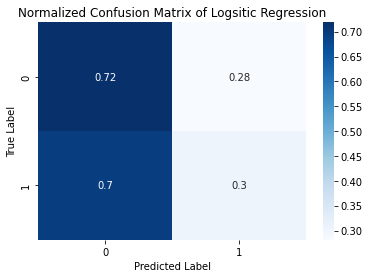

Accuracy Score is 0.5111732
          0         1
0  0.718675  0.281325
1  0.696329  0.303671


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')


model.fit(X1_train_new, Y1_train_new)
Y1_predict = model.predict(X1_test_new)

cm3a = confusion_matrix(Y1_test_new,Y1_predict)
sum_mat3 = np.sum(cm3a, axis=1)
cm3 = cm3a/sum_mat3[0]
sns.heatmap(cm3, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of Logsitic Regression")
plt.savefig('Image_7.png',facecolor='w')
plt.show()

print('Accuracy Score is {:.7}'.format(accuracy_score(Y1_test_new, Y1_predict)))
print(pd.DataFrame(cm3))




Based on the accuracy score, the Decision tree model is the most accurate

In [ ]:
# plot_confusion_matrix is  used to output the confusion matrix which is a table used in machine learning tasks
# to evaluate where errors were made in the model. The rows represent the classes that the results should have 
# been, and the columns represent the predictions we made. The table is helpful to see which predictions are wrong.

## We used another approach to plot it, but the following function could also have been used.

# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):

#    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#   plt.title(title)
#    plt.colorbar()
#    tick_marks = np.arange(len(classes))
#    plt.xticks(tick_marks, classes, rotation=45)
#    plt.yticks(tick_marks, classes)

#    if normalize:
#        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#        print("Normalized confusion matrix")
#    else:
#        print('Confusion matrix, without normalization')

#    print(cm)

#    fmt = '.2f' if normalize else 'd'
#    thresh = cm.max() / 2.
#    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#        plt.text(j, i, format(cm[i, j], fmt),
#                 horizontalalignment="center",
#                 color="white" if cm[i, j] > thresh else "black")

#    plt.tight_layout()
#    plt.ylabel('True label')
#    plt.xlabel('Predicted label')